In [68]:
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
import numpy as np

%matplotlib widget

def lmap(f,x):
    return list(map(f,x))

def lfilter(f,x):
    return list(filter(f,x))

In [69]:
## THIS IS ALL THE DATA FOR k-point OTPIMISATION OF Mn2Sb
## we tested GGA/LDA for 1k, 2k, 4k and 8k k-points of the 3 main structures: ferri, FM, AFM
data = {
    "GGA": {
        "ferri": {
            "k": [1000, 2000, 4000, 8000],
            "t_sys": [0, 9 * 60 + 47, 25 * 60 + 19, 45 * 60 + 45],
            "t_real": [0, 40 * 60 + 10, 193 * 60 + 52, 289 * 60 + 41],
            "E": [-35203.71287134, -35203.71313403, -35203.71312552, -35203.71305293],
            "M": [-2.05353, -2.04654, -2.05590, -2.04835],
        },
        "FM": {
            "k": [1000, 2000, 4000, 8000],
            "t_sys": [0, 8 * 60 + 26, 21 * 60 + 38, 41 * 60 + 34],
            "t_real": [0, 33 * 60 + 53, 161 * 60 + 37, 275 * 60 + 43],
            "E": [-35203.68211603, -35203.68222677, -35203.68216694, -35203.68208490],
            "M": [13.30843, 13.32333, 13.35492, 13.36111],
        },
        "AFM": {
            "k": [1000, 2000, 4000, 8000],
            "t_sys": [0, 10 * 60 + 59, 25 * 60 + 10, 43 * 60 + 37],
            "t_real": [0, 49 * 60 + 9, 190 * 60 + 59, 281 * 60 + 59],
            "E": [-35203.68776432, -35203.68793386, -35203.68790872, -35203.68787219],
            "M": [0.00000, -0.00006, -0.00004, -0.00001],
        },
    },
    "LDA": {
        "ferri": {
            "k": [1000, 2000, 4000, 8000],
            "t_sys": [6 * 60 + 41, 16 * 60 + 54, 19 * 60 + 59, 35 * 60 + 20],
            "t_real": [61 * 60 + 44, 154 * 60 + 35, 169 * 60 + 35, 239 * 60 + 1],
            "E": [-35164.84322737, -35164.84355323, -35164.84263540, -35164.84262103],
            "M": [-2.36520, -2.34662, -2.36790, -2.37463],
        },
        "FM": {
            "k": [1000, 2000, 4000, 8000],
            "t_sys": [0, 17 * 60 + 46, 28 * 60 + 13, 44 * 60 + 3],
            "t_real": [0, 160 * 60 + 19, 208 * 60 + 42, 263 * 60 + 16],
            "E": [-35164.81553176, -35164.81576070, -35164.81576226, -35164.81567849],
            "M": [12.30534, 12.27372, 12.27955, 12.36548],
        },
        "AFM": {
            "k": [1000, 2000, 4000, 8000],
            "t_sys": [7 * 60 + 22, 15 * 60 + 53, 28 * 60 + 17, 44 * 60 + 14],
            "t_real": [73 * 60 + 21, 147 * 60 + 10, 208 * 60 + 21, 262 * 60 + 37],
            "E": [-35164.82010549, -35164.82028797, -35164.82027394, -35164.82021282],
            "M": [0.00009, 0.00006, 0.00001, 0.00011],
        },
    },
}

Text(0, 0.5, '$\\Delta E = E - E_{lowest}$ [mRy]')

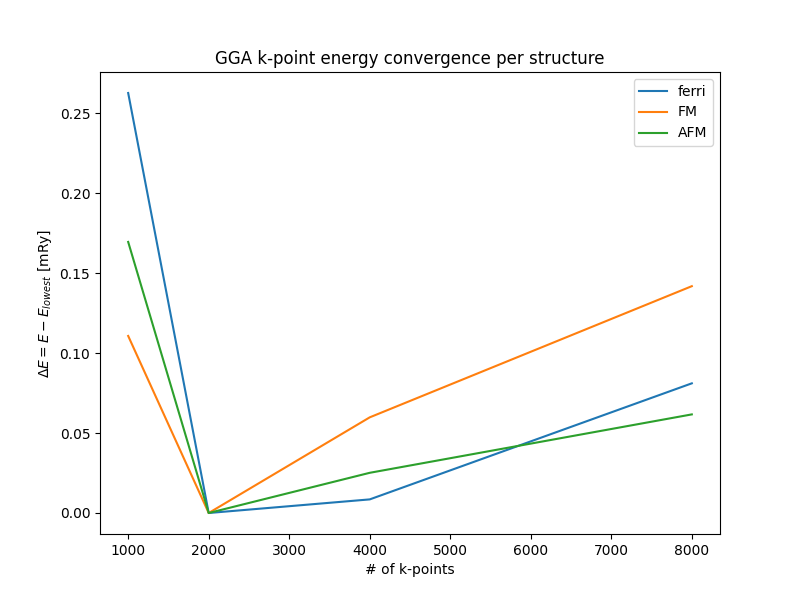

In [70]:
plt.figure(figsize=(8,6))

plt.title("GGA k-point energy convergence per structure")


plt.plot(
    data["GGA"]["ferri"]["k"],
    (np.array(data["GGA"]["ferri"]["E"]) - min(data["GGA"]["ferri"]["E"]))*1000,
    label="ferri",
)
plt.plot(
    data["GGA"]["FM"]["k"],
    (np.array(data["GGA"]["FM"]["E"]) - min(data["GGA"]["FM"]["E"]))*1000,
    label="FM",
)
plt.plot(
    data["GGA"]["AFM"]["k"],
    (np.array(data["GGA"]["AFM"]["E"]) - min(data["GGA"]["AFM"]["E"]))*1000,
    label="AFM",
)

plt.legend()
plt.xlabel("# of k-points")
plt.ylabel("$\Delta E = E - E_{lowest}$ [mRy]")

Text(0, 0.5, '$\\Delta E = E - E_{total-lowest}$ [mRy]')

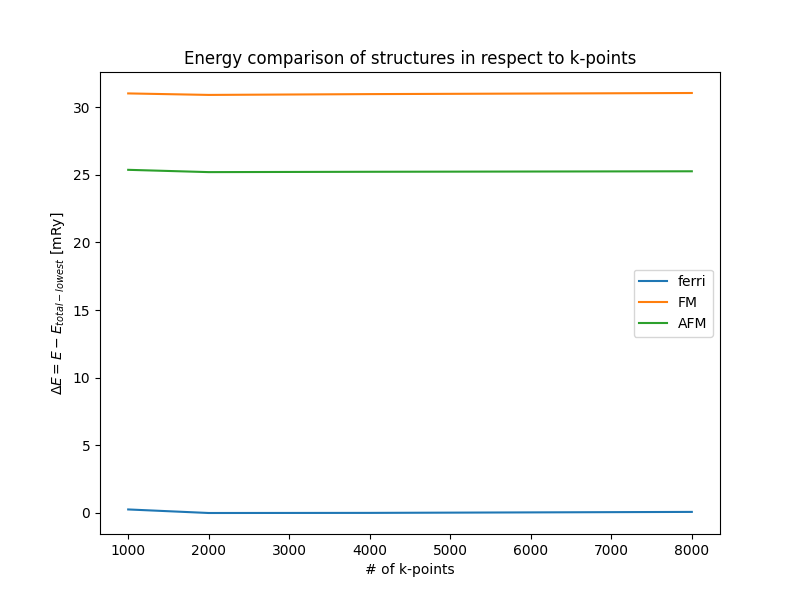

In [71]:
plt.figure(figsize=(8,6))

plt.title("Energy comparison of structures in respect to k-points")


ground_truth_E = min(data["GGA"]["ferri"]["E"])
plt.plot(
    data["GGA"]["ferri"]["k"],
    (np.array(data["GGA"]["ferri"]["E"]) - ground_truth_E)*1000,
    label="ferri",
)
plt.plot(
    data["GGA"]["FM"]["k"],
    (np.array(data["GGA"]["FM"]["E"]) - ground_truth_E)*1000,
    label="FM",
)
plt.plot(
    data["GGA"]["AFM"]["k"],
    (np.array(data["GGA"]["AFM"]["E"]) - ground_truth_E)*1000,
    label="AFM",
)

plt.legend()
plt.xlabel("# of k-points")
plt.ylabel("$\Delta E = E - E_{total-lowest}$ [mRy]")

Text(0, 0.5, '$\\Delta M = M - M_{lowest}$ [m$\\mu$B]')

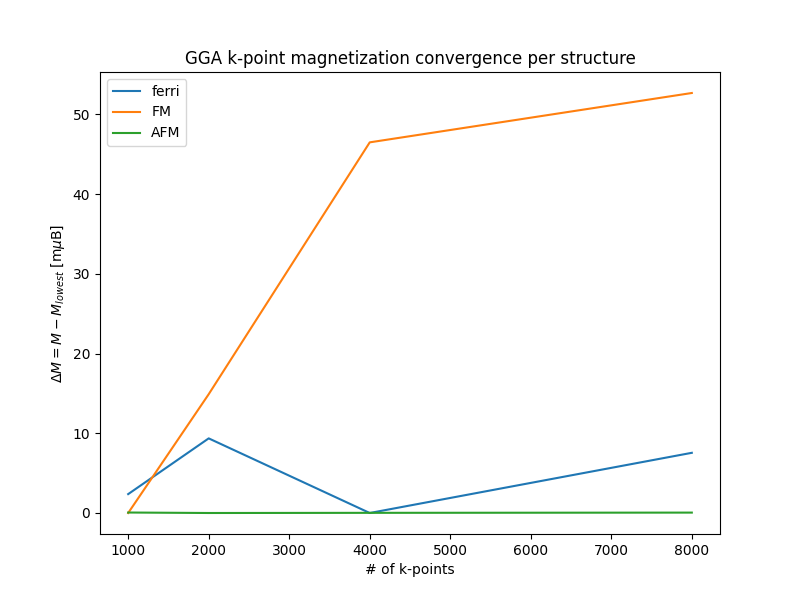

In [72]:
plt.figure(figsize=(8, 6))

plt.title("GGA k-point magnetization convergence per structure")


plt.plot(
    data["GGA"]["ferri"]["k"],
    (np.array(data["GGA"]["ferri"]["M"]) - min(data["GGA"]["ferri"]["M"])) * 1000,
    label="ferri",
)
plt.plot(
    data["GGA"]["FM"]["k"],
    (np.array(data["GGA"]["FM"]["M"]) - min(data["GGA"]["FM"]["M"])) * 1000,
    label="FM",
)
plt.plot(
    data["GGA"]["AFM"]["k"],
    (np.array(data["GGA"]["AFM"]["M"]) - min(data["GGA"]["AFM"]["M"])) * 1000,
    label="AFM",
)

plt.legend()
plt.xlabel("# of k-points")
plt.ylabel("$\Delta M = M - M_{lowest}$ [m$\mu$B]")